Индивидуальный проект: **Название проекта**

Автор: **ФИО**

Проверяющий: **ФИО**

Ссылка на датасет:

### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
4. Генерация и селекция признаков + нормализация
5. Исключение аномалий, заполнение пропусков в данных и.т.д.
6. Очистка данных от шума
7. Выбор метода/алгоритма, модели, архитектуры (для НС)
8. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма
9. Выбор метрики оценки качества (RMSE, R^2)
10. Генерация наборов для обучения, тестирования и валидации
11. Развертывание и работа модели, визуализация результатов
12. Выводы

## 1. Цель и задачи исследования


**Какую задачу планируете решить — коротко**

- Почему такакя задача показалась Вам интересной?

## 2. Описание набора данных

Данные взяты из: 

[Добавить ссылка на данные, если они открыты](_____)


### Описание данных

Датасет представлен в виде каких файлов? Сколько их?
Как собирались данные? Для чего — просто коротко о датасете.
Описать объем данных.

- Выборка включает __  записей и __ признаков (строки и столбцы соответственно).
- Целевая переменная **название целевой переменной** — что обозначает

- Количественные переменные:
    - **название признака#1** — что обозначает этот признак;
    - ....
    - **название признака#N** — что обозначает этот признак;
    
- Категориальные переменные:

    - **название признака#1** — что обозначает этот признак;
    - ....
    - **название признака#N** — что обозначает этот признак;

Если вы на этом шаге уже не планируете использовать какой-то признак, напишите об этом. 

##  3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация

[Что такое EDA?](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

     Temperature              L         R    A_M  Color  Spectral_Class  Type
4           1939       0.000138     0.103  20.06      1               0     0
2           2600       0.000300     0.102  18.70      1               0     0
7           2600       0.000400     0.096  17.40      1               0     0
78          2621       0.000600     0.098  12.81      1               0     1
6           2637       0.000730     0.127  17.22      1               0     0
..           ...            ...       ...    ...    ...             ...   ...
239        37882  294903.000000  1783.000  -7.80      7               2     5
231        38234  272830.000000  1356.000  -9.29      7               2     5
235        38940  374830.000000  1356.000  -9.93      7               2     5
30         39000  204000.000000    10.600  -4.70      7               2     3
101        40000  813000.000000    14.000  -6.23      7               2     4

[240 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.844013   
L                  0.393404  1.000000  0.526516 -0.692619  0.283564   
R                  0.064216  0.526516  1.000000 -0.608728 -0.051461   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.369971   
Color              0.844013  0.283564 -0.051461 -0.369971  1.000000   
Spectral_Class     0.305307  0.130096 -0.048535 -0.232926  0.575604   
Type               0.411129  0.676845  0.660975 -0.955276  0.432355   

                Spectral_Class      Type  
Temperature           0.305307  0.411129  
L                     0.130096  0.676845  
R                    -0.048535  0.660975  
A_M                  -0.232926 -0.955276  
Color                 0.575604  0.432355  
Spectral_Class        1.000000  0.347333  
Type                  0.347333  1.000000  


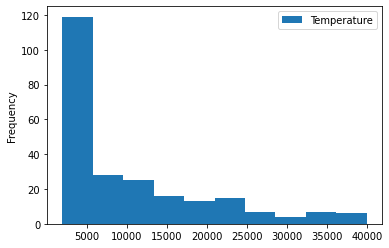

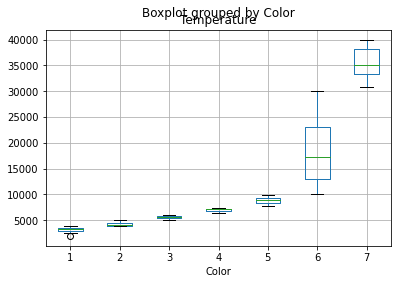

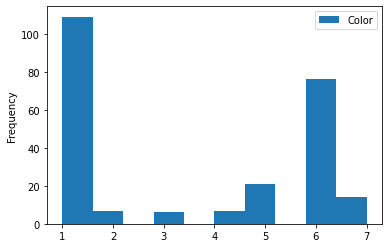

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
dataset = pd.read_csv('Stars.csv')
dataset = dataset.sort_values(by='Temperature')
dataset.loc[(dataset.Temperature >=0), 'Color'] = 1
dataset.loc[(dataset.Temperature >3800  ), 'Color'] = 2
dataset.loc[(dataset.Temperature >5000 ), 'Color'] = 3
dataset.loc[(dataset.Temperature >6000 ), 'Color'] = 4
dataset.loc[(dataset.Temperature >7400 ), 'Color'] = 5
dataset.loc[(dataset.Temperature >10000 ), 'Color'] = 6
dataset.loc[(dataset.Temperature >30000  ), 'Color'] = 7
dataset.loc[(dataset.Spectral_Class == 'M'), 'Spectral_Class'] = 0
dataset.loc[(dataset.Spectral_Class == 'B'), 'Spectral_Class'] = 1
dataset.loc[(dataset.Spectral_Class == 'O'), 'Spectral_Class'] = 2
dataset.loc[(dataset.Spectral_Class == 'A'), 'Spectral_Class'] = 3
dataset.loc[(dataset.Spectral_Class == 'F'), 'Spectral_Class'] = 4
dataset.loc[(dataset.Spectral_Class == 'K'), 'Spectral_Class'] = 5
dataset.loc[(dataset.Spectral_Class == 'G'), 'Spectral_Class'] = 5
dataset['Color']=dataset.Color.astype('int64')
dataset['Spectral_Class']=dataset.Spectral_Class.astype('int64')
print(dataset)

dataset.plot(x = "Color" , y = "Temperature" ,kind = 'hist')
dataset.boxplot(column = ['Temperature'], by = 'Color')
dataset.plot(y = "Color" ,kind = 'hist')
print(dataset.corr())

- выгрузка данных
- визуализация
- взаимодействие между параметрами (корреляция и прочее)
- проверка на нормальность
- закономерности, "инсайты", особенности данных

## 7. Выбор метода/алгоритма, модели, архитектуры (для НС)

- Выбрать 2 типа модели:

    - Одну baseline модель — это может быть `линейная регрессия` (для задачи регрессии), `k-nearest neighbour` для задачи классификации, `k-means` для кластеризации

    - Вторую посложнее — для задачи регрессии, random forest, gradient-boosted tree ([XGBoost & CatBoost](https://towardsdatascience.com/catboost-vs-lightgbm-vs-xgboost-c80f40662924)) и другие. Дополнительно для временных рядов: SARIMAX, [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api). Для задачи классификации: logistic regression, decision tree, random forest, gradient-boosted tree ([XGBoost & CatBoost](https://towardsdatascience.com/catboost-vs-lightgbm-vs-xgboost-c80f40662924)), multilayer perceptron и другие.

  Если у Вас задачка с изображениями — необходимо выбрать [простую уже обученную ИНС](https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8).

[5 3 4 4 1 0 0 2 1 4 0 5 5 0 1 5 1 5 3 5 1 1 2 3 4 2 4 3 1 5 5 5 5 2 3 4 3
 1 5 2 3 0 1 2 3 2 5 5 4 5 1 5 3 2 4 1 4 3 0 1 3 3 4 1 0 5 0 0 4 2 4 3]
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.54      0.64      0.58        11
           2       0.67      0.75      0.71         8
           3       0.77      0.67      0.71        15
           4       0.75      0.64      0.69        14
           5       0.69      0.79      0.73        14

    accuracy                           0.67        72
   macro avg       0.66      0.66      0.66        72
weighted avg       0.67      0.67      0.67        72



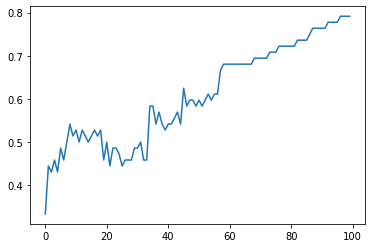

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
error_rates = []
features = ['Temperature','L','R','A_M','Color','Spectral_Class']

x =  dataset[features]
y = dataset['Type']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print(predictions)
print(classification_report(y_test_data, predictions))
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))
plt.plot(error_rates)


<class 'pandas.core.frame.DataFrame'>
[3 3 3 1 1 0 4 5 0 2 3 0 0 2 2 3 3 4 3 1 4 0 0 0 4 5 0 2 2 4 0 4 5 5 4 3 0
 5 2 5 0 1 3 5 5 2 1 3 3 0 2 5 2 4 3 0 4 1 0 0 1 5 3 1 0 0 1 1 0 3 4 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



[Text(0.5714285714285714, 0.9166666666666666, 'R <= 0.046\ngini = 0.831\nsamples = 168\nvalue = [22, 30, 30, 26, 30, 30]'),
 Text(0.42857142857142855, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30, 0, 0, 0]'),
 Text(0.7142857142857143, 0.75, 'R <= 403.45\ngini = 0.797\nsamples = 138\nvalue = [22, 30, 0, 26, 30, 30]'),
 Text(0.5714285714285714, 0.5833333333333334, 'R <= 11.1\ngini = 0.746\nsamples = 108\nvalue = [22, 30, 0, 26, 30, 0]'),
 Text(0.42857142857142855, 0.4166666666666667, 'Color <= 1.5\ngini = 0.661\nsamples = 78\nvalue = [22, 30, 0, 26, 0, 0]'),
 Text(0.2857142857142857, 0.25, 'A_M <= 15.53\ngini = 0.488\nsamples = 52\nvalue = [22, 30, 0, 0, 0, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0, 0, 0, 0]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0, 0, 0]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26, 0, 0]'),
 Text(0.71428571428571

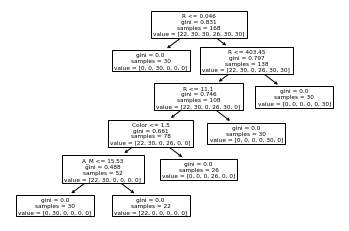

In [63]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
features = ['Temperature','L','R','A_M','Color','Spectral_Class']

x =  dataset[features]
y = dataset['Type']
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.7)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(type(X_test))
print(predictions)
print(classification_report(y_test, predictions))
tree.plot_tree(dtree,feature_names=features)

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: %.3f' % (mse))
import math
print("mse^(1/2) = ", math.sqrt(mse))

mse: 0.069
mse^(1/2) =  0.26352313834736496


In [92]:
print("Введите  Temperature L  R  A_M  Color  Spectral_Class")
f_list = {'Temperature':[],'L' : [],'R' : [], 'A_M': [], 'Color': [], 'Spectral_Class': [] }
f_list['Temperature'].append(float(input()))
f_list['L'].append(float(input()))
f_list['R'].append(float(input()))
f_list['A_M'].append(float(input()))
f_list['Color'].append(float(input()))
f_list['Spectral_Class'].append(float(input()))
print(f_list)
data = pd.DataFrame(f_list)
prediction = dtree.predict(data)
print("Предсказание типа звезды по дереву решений:",prediction)
prediction = model.predict(data)
print("Предсказание типа звезды по методу k ближайших соседей",prediction)


Введите  Temperature L  R  A_M  Color  Spectral_Class
1939
0.000138
0.103
20.06
1
0
{'Temperature': [1939.0], 'L': [0.000138], 'R': [0.103], 'A_M': [20.06], 'Color': [1.0], 'Spectral_Class': [0.0]}
Предсказание типа звезды по дереву решений: [0]
Предсказание типа звезды по методу k ближайших соседей [0]


## 8. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма

- Самый естественный способ организовать подбор гиперпараметров — сделать перебор по сетке (`Grid Search`):

  - для каждого гиперпараметра фиксируется несколько значений;
  - перебираются все комбинации значений различных гиперпараметров, на каждой из этих комбинаций модель обучается и тестируется;
  - выбирается комбинация, на которой модель показывает лучшее качество;
  - есть много библиотечных функций для [Grid Search](https://pythonpip.ru/osnovy/poisk-po-setke-python), например [тут](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html);

## 9. Выбор метрики оценки качества (RMSE, R^2)

- Выбрать метрики (обосновать выбор).

Важно внимательно подходить к выбору метрики: в случае с несбалансированными классами классификатор может все объекты записать в класс, который представлен большим количеством объектов, а такая метрика как accuracy (доля объектов, для которых мы правильно предсказали класс для задачи классификации) будет все такой же высокой.

Для регрессии (MSE, RMSE, MAE, R^2 и другие). Используйте RMSE, если хотите, чтобы большие ошибки были более значительными.
Более подробно [по ссылке](https://ml-handbook.ru/chapters/model_evaluation/intro).


Задачи с кластеризацией (рекомендательные системы) сложнее проверить экспериментально. Один из способов сделать это — взять часть ваших данных и спрятать их. Когда ваша модель построена, используйте её, чтобы предсказать рекомендации для скрытых данных и посмотреть, как они выстраиваются. (добавлю позже ссылку).

- Определить какое значение будет успешным для вашей задачи.

## 10. Генерация наборов для обучения, тестирования и валидации

- Разделение выборки на обучающую и тестовую (70/30 или 80/20).
    - Отложить тестовую выборку до финального теста
    - Валидационная часть может быть выделена автоматически при кросс-валидации


- Провести кросс-валидацию. Кросс-валидация может быть нужна в случаях, если данных мало или мы не хотим зависеть от конкретного выбора валидационного множества. 

   - Например, можно использовать метод `k-Fold`

  - Кросс-валидация для временных рядов посложнее, так как данные не должны пересекаться по времени: тренировочные данные должны идти до валидационных, а валидационные — до тестовых

## 11. Развертывание и работа модели, визуализация результатов

После того, как выбраны лучшие гиперпараметры модели, необходимо обучить модель на данных параметрах и протестировать на тестовой выборке.

## 12. Выводы

Предупреждая возможный холивар — структура данного фреймворка не истина в 
последней инстанции, есть много других способов структурировать свои 
пайплайны — это всего лишь один из них.

- EDA (exploratory data analysis). Тут надо сделать замечание — на Kaggle есть специально обученные люди :), которые в каждом соревновании пилят сногсшибательные EDA кернелы. Переплюнуть их у вас вряд-ли получится, но понимать, как можно смотреть на данные все-равно придется, поскольку в боевых задачах этим специально обученным человеком будете вы. Поэтому изучаем подходы, расширяем наши библиотеки.
- Data Cleaning — все, что касается очистки данных. Выбросы, пропуски, и т.д.
- Data preparation — все, что касается подготовки данных для модели. Несколько блоков:
  - Общий
  - Для регрессий/нейронных сетей
  - Для деревьев
  - Специальный (временные ряды, картинки, FM/FFM)
  - Текст (Vectorizers, TF-IDF, Embeddings)
- Models
  - Linear models
  - Tree models
  - Neural Networks
  - Exotic (FM/FFM)
- Feature selection
- Hyperparameters search
- Ensemble